In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from pyaw import swarm, utils_spectral,utils_preprocess
from pyaw.swarm import Swarm
plt.rcParams['figure.figsize'] = [25,10]

import importlib

importlib.reload(swarm)
importlib.reload(utils_spectral)
importlib.reload(utils_preprocess)

<module 'pyaw.utils_preprocess' from 'D:\\cleo\\master\\pyaw\\pyaw\\utils_preprocess.py'>

In [168]:
# swarm.save_SW_EFIx_TCT16('20160311T000000','20160312T064000')

In [169]:
fp_e = r"\\Diskstation1\file_three\aw\swarm\A\efi16\sw_efi16A_20160311T064000_20160311T070000_0.pkl"
fp_b = r"\\Diskstation1\file_three\aw\swarm\A\vfm50\sw_vfm50A_20160311T064000_20160311T070000_0.pkl"
swarm_e = Swarm(fp_e, 'efi16','20160311T064020','20160311T065445')
swarm_b = Swarm(fp_b, 'vfm50','20160311T064020','20160311T065445')
# df_e = swarm_e.df.loc[pd.to_datetime('2016-03-11 06:47:00'):pd.to_datetime('2016-03-11 06:49:00')]
# df_b = swarm_b.df.loc[pd.to_datetime('2016-03-11 06:47:00'):pd.to_datetime('2016-03-11 06:49:00')]
df_e = swarm_e.df.loc[pd.to_datetime('20160311T064020'):pd.to_datetime('20160311T065445')]
df_b = swarm_b.df.loc[pd.to_datetime('20160311T064020'):pd.to_datetime('20160311T065445')]

self.df['eh_sc1'] set nan:
1997
datetime
2016-03-11 06:40:06.318749905    18.740198
2016-03-11 06:40:07.818749905    15.479125
2016-03-11 06:40:08.818749905    14.779911
2016-03-11 06:40:09.006750107    15.280976
2016-03-11 06:40:09.756750107    16.616550
                                   ...    
2016-03-11 06:55:04.693749905   -35.126980
2016-03-11 06:55:04.756750107   -29.897236
2016-03-11 06:55:04.818749905   -28.733795
2016-03-11 06:55:04.881750107   -31.835224
2016-03-11 06:55:04.943749905   -27.190887
Name: eh_sc1, Length: 1997, dtype: float32

self.df['eh_sc2'] set nan:
589
datetime
2016-03-11 06:47:48.631750107    1116.136230
2016-03-11 06:47:48.693749905    1207.597534
2016-03-11 06:54:28.318749905    -592.636230
2016-03-11 06:54:28.381750107    -592.880005
2016-03-11 06:54:28.443749905    -593.796875
                                    ...     
2016-03-11 06:55:04.693749905    -573.121338
2016-03-11 06:55:04.756750107    -557.361450
2016-03-11 06:55:04.818749905    -561.4285

signal1 = e compo
signal2 = b compo (with signal1, consist of a pair)

In [170]:
signal1 = df_e['eh1_enu2']

In [171]:
signal2 = df_b['b1_enu1']

(<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>)

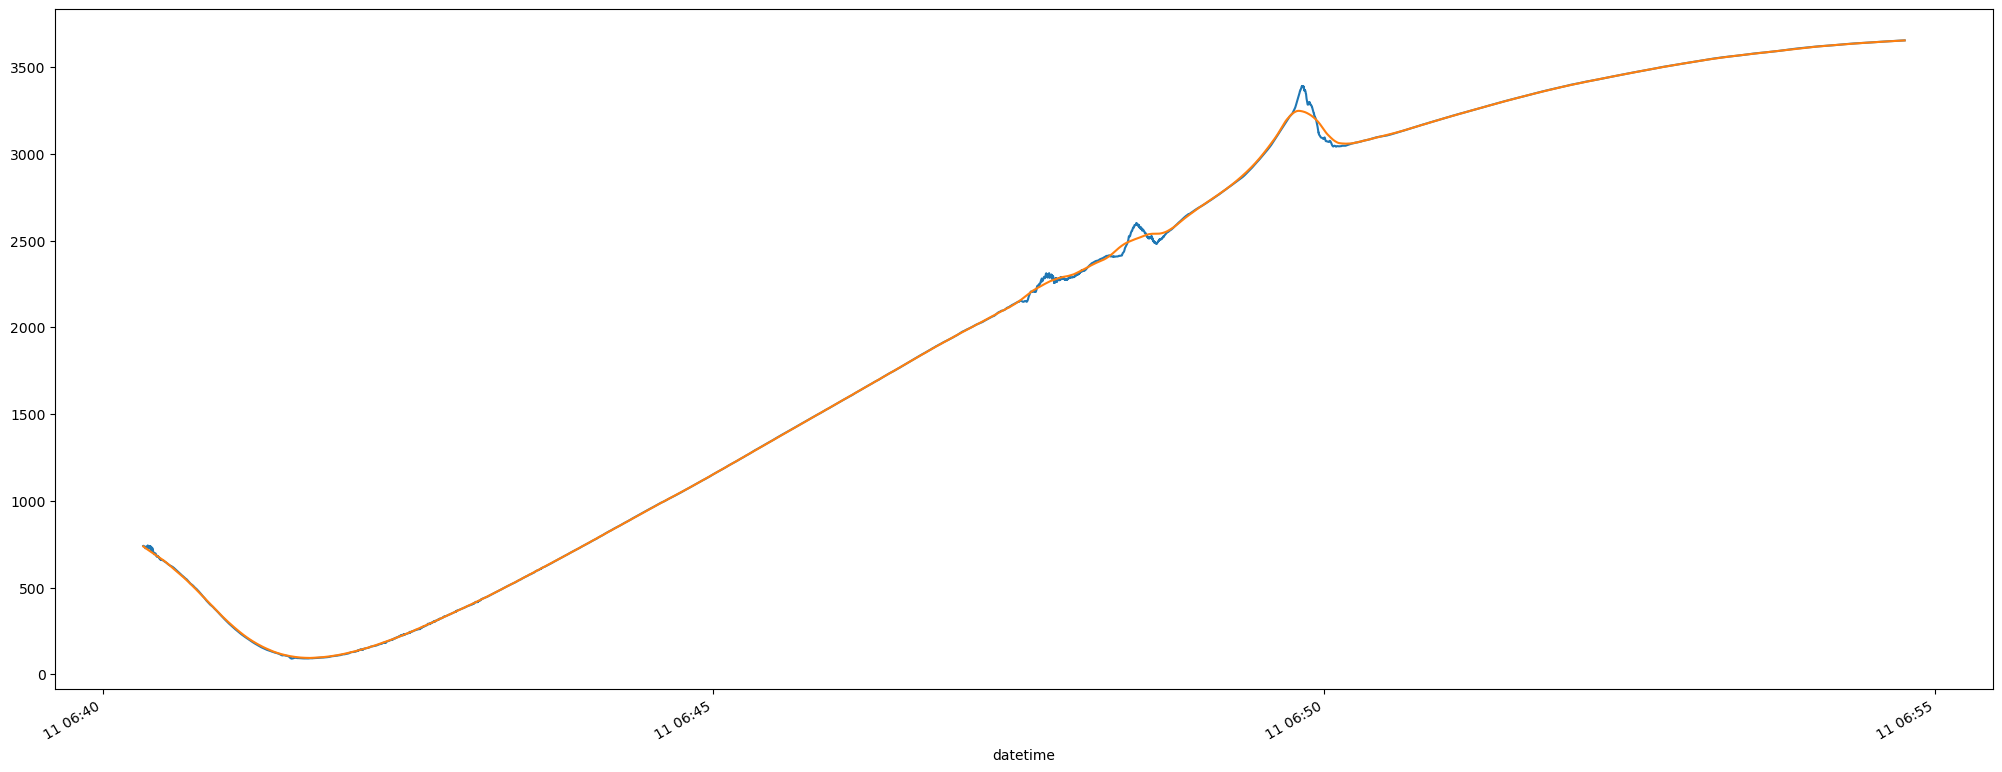

In [172]:
df_b['b_enu1'].plot(),df_b['b0_enu1'].plot()

In [173]:
low_fre = 0.2
high_fre = 8
signal1_filtered = pd.Series(data=utils_preprocess.LHBFilter(signal1, 16,lowcut=0.2, highcut=4).apply_filter(), index=signal1.index)
signal2_filtered = pd.Series(data=utils_preprocess.LHBFilter(signal2, 50, lowcut=0.2, highcut=4).apply_filter(), index=signal2.index)

In [174]:
# signal2_filtered_8 = pd.Series(data=utils_preprocess.LHBFilter(signal2, 50, lowcut=8).apply_filter(), index=signal2.index)
# signal2.plot(),signal2_filtered_8.plot()

In [175]:
signal1_stft = utils_spectral.STFT(signal1,16)
signal2_stft = utils_spectral.STFT(signal2,50)
signal1_stft_freqs, signal1_stft_times, Sxx = signal1_stft.get_stft()
signal1_stft_times = signal1.index[0] + pd.to_timedelta(signal1_stft_times, unit='s')
signal1_stft_Sxx = abs(Sxx)
signal2_stft_freqs, signal2_stft_times, Sxx = signal2_stft.get_stft()
signal2_stft_times = signal2.index[0] + pd.to_timedelta(signal2_stft_times, unit='s')
signal2_stft_Sxx = abs(Sxx)

# 频率范围
freq_min = 0
freq_max = 8
# 通过布尔索引选取频率范围 [0, 8] 的数据
freq_mask = (signal2_stft_freqs >= freq_min) & (signal2_stft_freqs <= freq_max)
signal2_stft_selected_freqs = signal2_stft_freqs[freq_mask]  # 筛选频率
signal2_stft_selected_Sxx = signal2_stft_Sxx[freq_mask, :]   # 筛选对应的谱图数据

In [176]:
signal2_align = utils_preprocess.align_high2low(signal2,signal1)

(<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>)

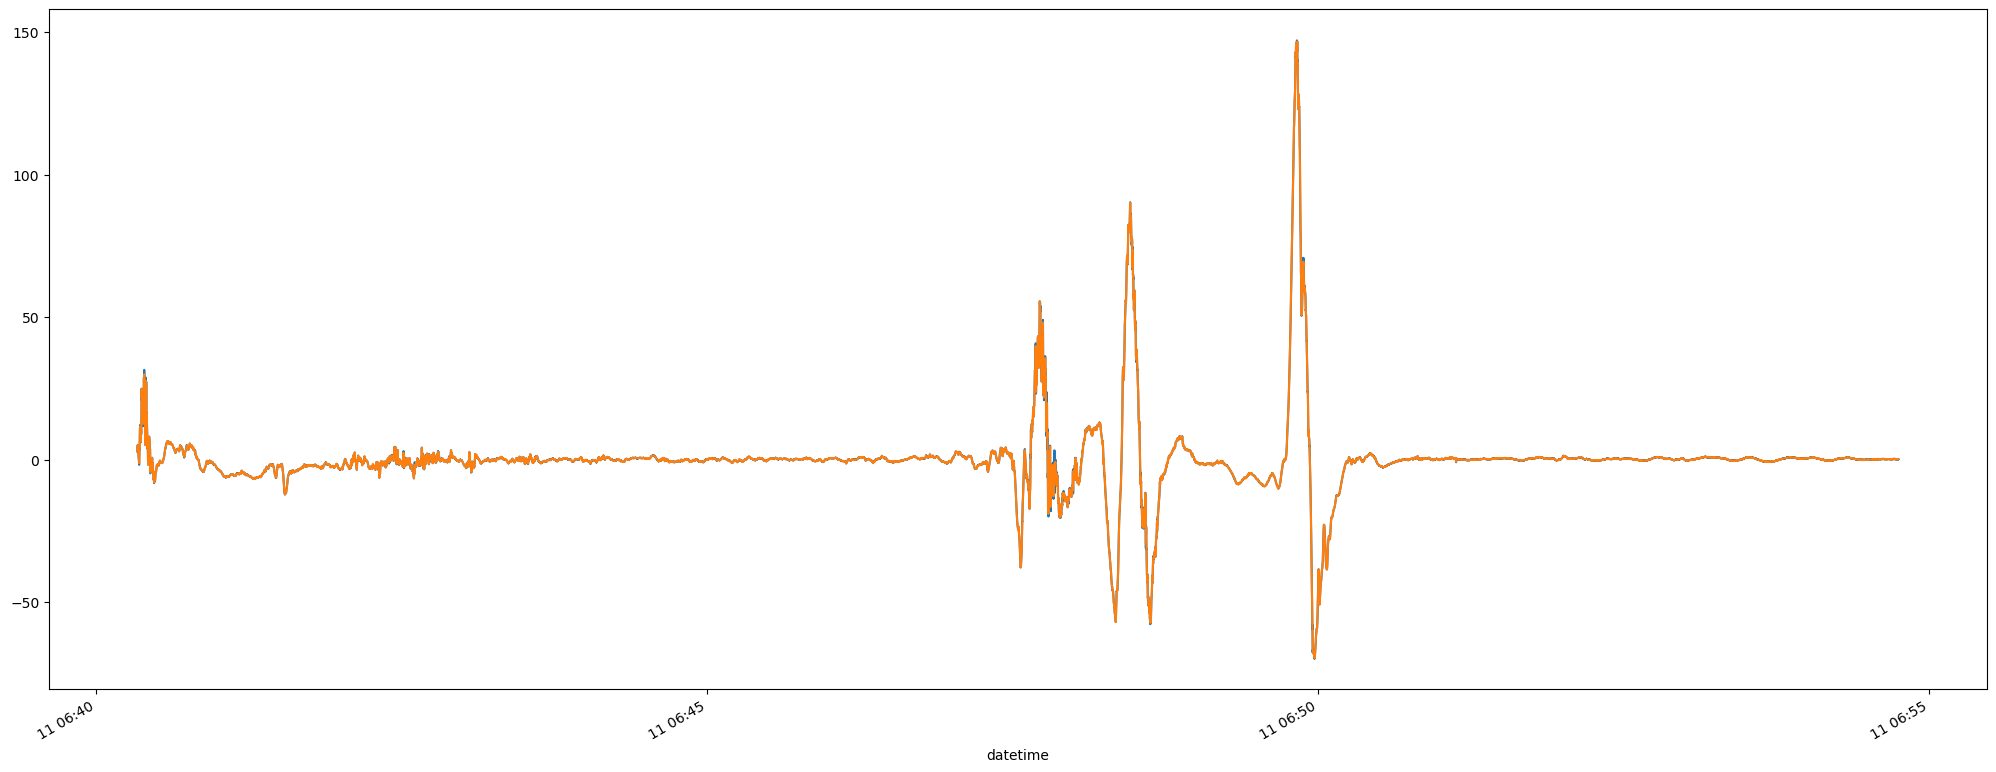

In [177]:
signal2.plot(),signal2_align.plot()

In [178]:
cwt21 = utils_spectral.CWT(signal1, signal2_align, sampling_period=1 / 16)
cwt21_cross_spectrum_modulus, _, cwt21_freqs = cwt21.get_cross_spectral()
# 频率范围
cwt21_freq_min = 0
cwt21_freq_max = 8
# 通过布尔索引选取频率范围 [0, 8] 的数据
cwt21_freq_mask = (cwt21_freqs >= cwt21_freq_min) & (cwt21_freqs <= cwt21_freq_max)
cwt21_selected_freqs = cwt21_freqs[cwt21_freq_mask]  # 筛选频率
cwt21_selected_cross_spectrum_modulus = cwt21_cross_spectrum_modulus[cwt21_freq_mask, :]   # 筛选对应的谱图数据

# cwt21.plot_module()

In [179]:
# plt.figure(figsize=(10, 4))
# plt.pcolormesh(signal1_stft_times, signal1_stft_freqs, signal1_stft_Sxx, shading='gouraud')
# plt.ylim([0,8])
# plt.colorbar(label='csd module')
# plt.xlabel('UT Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.title('Cross-Spectrogram module between Signal 1 and Signal 2')
# plt.show()

In [180]:
# freqs, times, Sxx = signal2_stft.get_stft()
# times =
# Sxx = abs(Sxx)
# plt.figure(figsize=(10, 4))
# plt.pcolormesh(times, freqs, Sxx, shading='gouraud')
# plt.ylim([0,8])
# plt.colorbar(label='csd module')
# plt.xlabel('UT Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.title('Cross-Spectrogram module between Signal 1 and Signal 2')
# plt.show()

Text(0, 0.5, 'cross spectrum modulus')

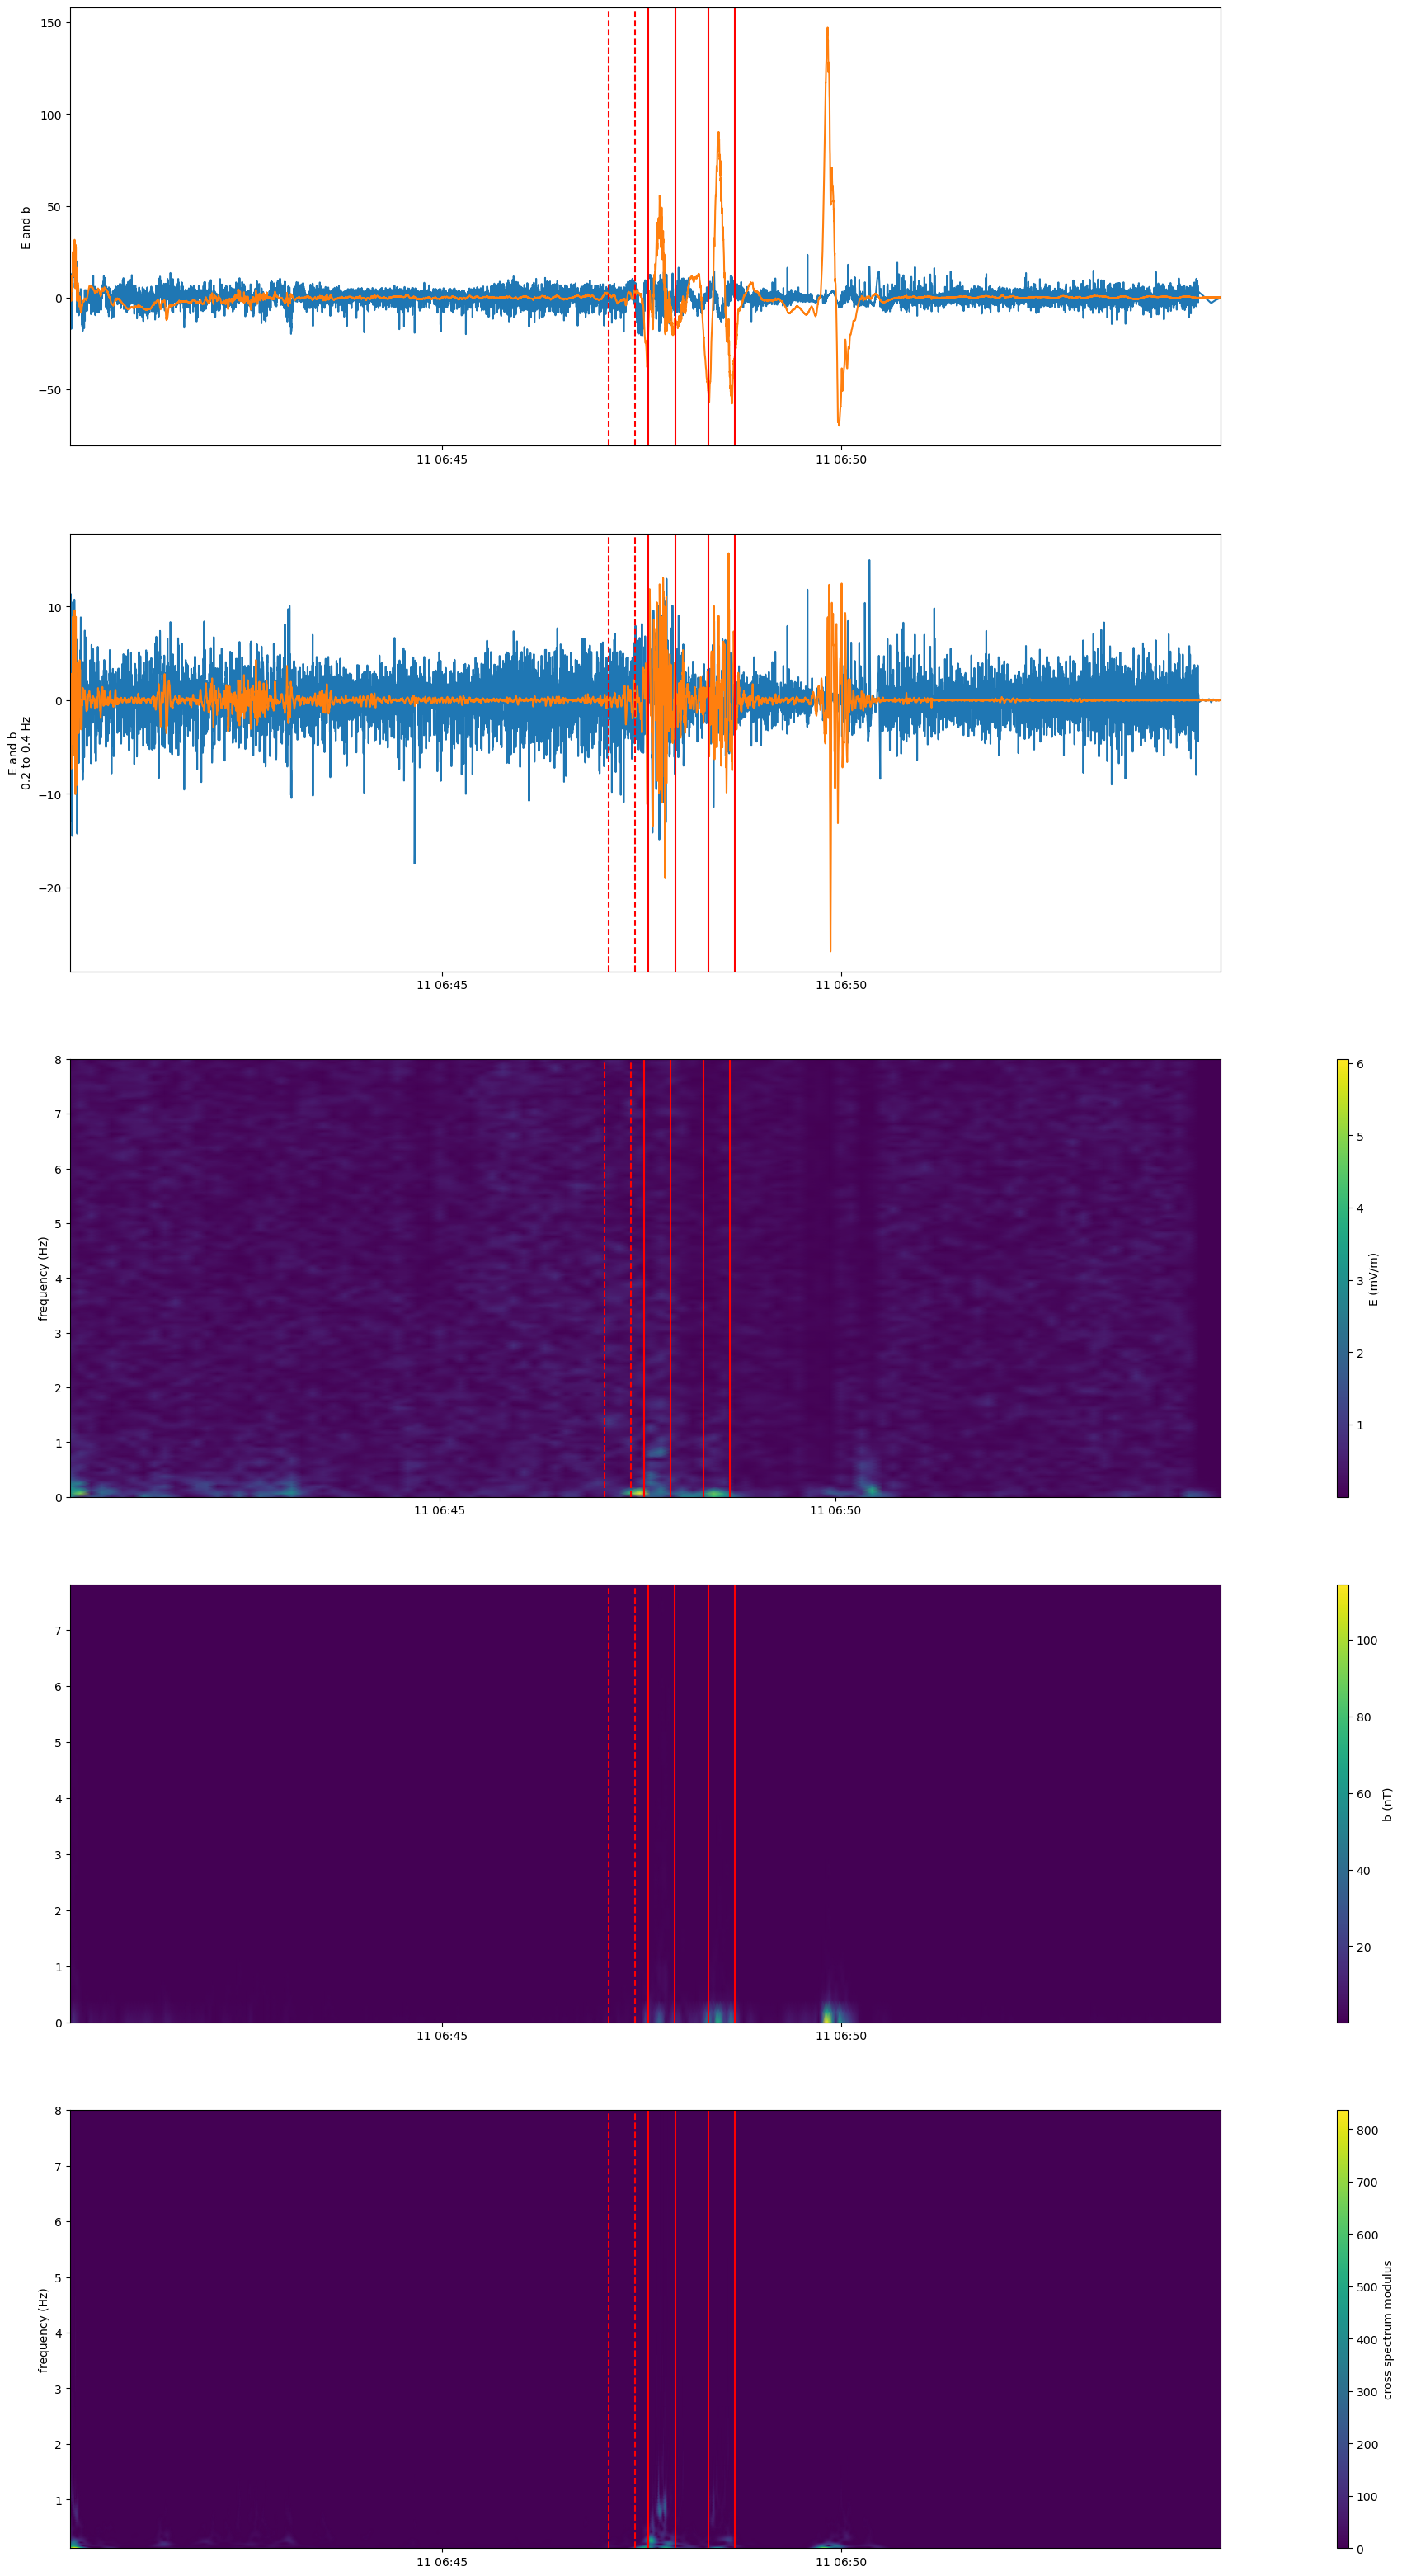

In [181]:
def plot_vline(ax,color='red'):
    ax.axvline(x=pd.to_datetime('2016-03-11 06:47:05'),color=color,linestyle='--')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:47:25'),color=color,linestyle='--')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:47:35'),color=color,linestyle='-')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:47:55'),color=color,linestyle='-')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:48:20'),color=color,linestyle='-')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:48:40'),color=color,linestyle='-')
    return None

fig = plt.figure(figsize=(20,40))

gs = GridSpec(5,2,width_ratios=[1,0.01],figure=fig)

#
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(signal1.index,signal1.values)
ax1.plot(signal2.index,signal2.values)
ax1.set_xlim(signal1.index[0],signal1.index[-1])
ax1.set_ylabel('E and b')
plot_vline(ax1)

#
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(signal1_filtered.index,signal1_filtered.values)
ax2.plot(signal2_filtered.index,signal2_filtered.values)
ax2.set_xlim(signal2_filtered.index[0],signal2_filtered.index[-1])
ax2.set_ylabel('E and b\n0.2 to 0.4 Hz')
plot_vline(ax2)

#
ax3 = fig.add_subplot(gs[2,0])
p1 = ax3.pcolormesh(signal1_stft_times, signal1_stft_freqs, signal1_stft_Sxx, shading='gouraud')
ax3.set_xlim(signal1_stft_times[0], signal1_stft_times[-1])
ax3.set_ylabel('frequency (Hz)')
plot_vline(ax3)

#
cbar_ax1 = fig.add_subplot(gs[2,1])
cbar1 = fig.colorbar(p1, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('E (mV/m)')

#
ax5 = fig.add_subplot(gs[3,0])
p2 = ax5.pcolormesh(signal2_stft_times, signal2_stft_selected_freqs, signal2_stft_selected_Sxx, shading='gouraud')
ax5.set_xlim(signal2_stft_times[0], signal2_stft_times[-1])
plot_vline(ax5)

#
cbar_ax2 = fig.add_subplot(gs[3,1])
cbar2 = fig.colorbar(p2, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('b (nT)')

#
ax6 = fig.add_subplot(gs[4,0])
p3 = ax6.pcolormesh(signal1.index, cwt21_selected_freqs, cwt21_selected_cross_spectrum_modulus, shading='gouraud')
ax6.set_xlim(signal1.index[0], signal1.index[-1])
ax6.set_ylabel('frequency (Hz)')
plot_vline(ax6)

#
cbar_ax3 = fig.add_subplot(gs[4,1])
cbar3 = fig.colorbar(p3, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('cross spectrum modulus')

In [182]:
# low_filter = utils_preprocess.LHBFilter(b1,50,lowcut=8.0)
# b1_filter_low = pd.Series(data=low_filter.apply_filter(),index=b1.index)

In [183]:
# b1.plot(),b1_filter_low.plot()

In [184]:
# # plt.subplot(311)
# # plt.plot(e1_baselined.index,e1_baselined.values,color='r',label='e1_baselined')
# # plt.plot(b2_baselined.index,b2_baselined.values,color='b',label='b2_baselined')
# # plt.legend()
# # # plt.xticks([])
#
# plt.subplot(311)
# plt.plot(signal1_filtered.index, signal1_filtered.values, color='r', label='e1_filterd')
# plt.plot(signal2_filtered.index, signal2_filtered.values, color='b', label='b2_filtered')
# plt.xlim(signal1_filtered.index[0], signal1_filtered.index[-1])
# plt.legend()
#
#
#
# plt.subplot(312)
# cross_spectrum_modulus, _, freqs = cwt21.get_cross_spectral()
# plt.imshow(cross_spectrum_modulus, extent=[cwt21.signal1.index[0], cwt21.signal1.index[-1], freqs[-1], freqs[0]],
#            aspect='auto', cmap='jet')
# plt.xlim(cwt21.signal1.index[0], cwt21.signal1.index[-1])
# # plt.colorbar(label='Module')
# plt.xlabel('UT Time [s]')
# plt.ylabel('Frequency [Hz]')
# plt.title('One dimensional Continuous Wavelet Transform Modulus')

static

In [185]:
mu0 = 4 * np.pi * 1e-7  # 真空磁导率 （维基）
Sigma_P_quiet = 0.5
Sigma_P_auroral = 3.0
va_quiet=1.3e6
va_auroral=1.4e6

signal1_back = signal1
signal2_align_back = signal2_align

Text(0.5, 1.0, 'Phase Histogram')

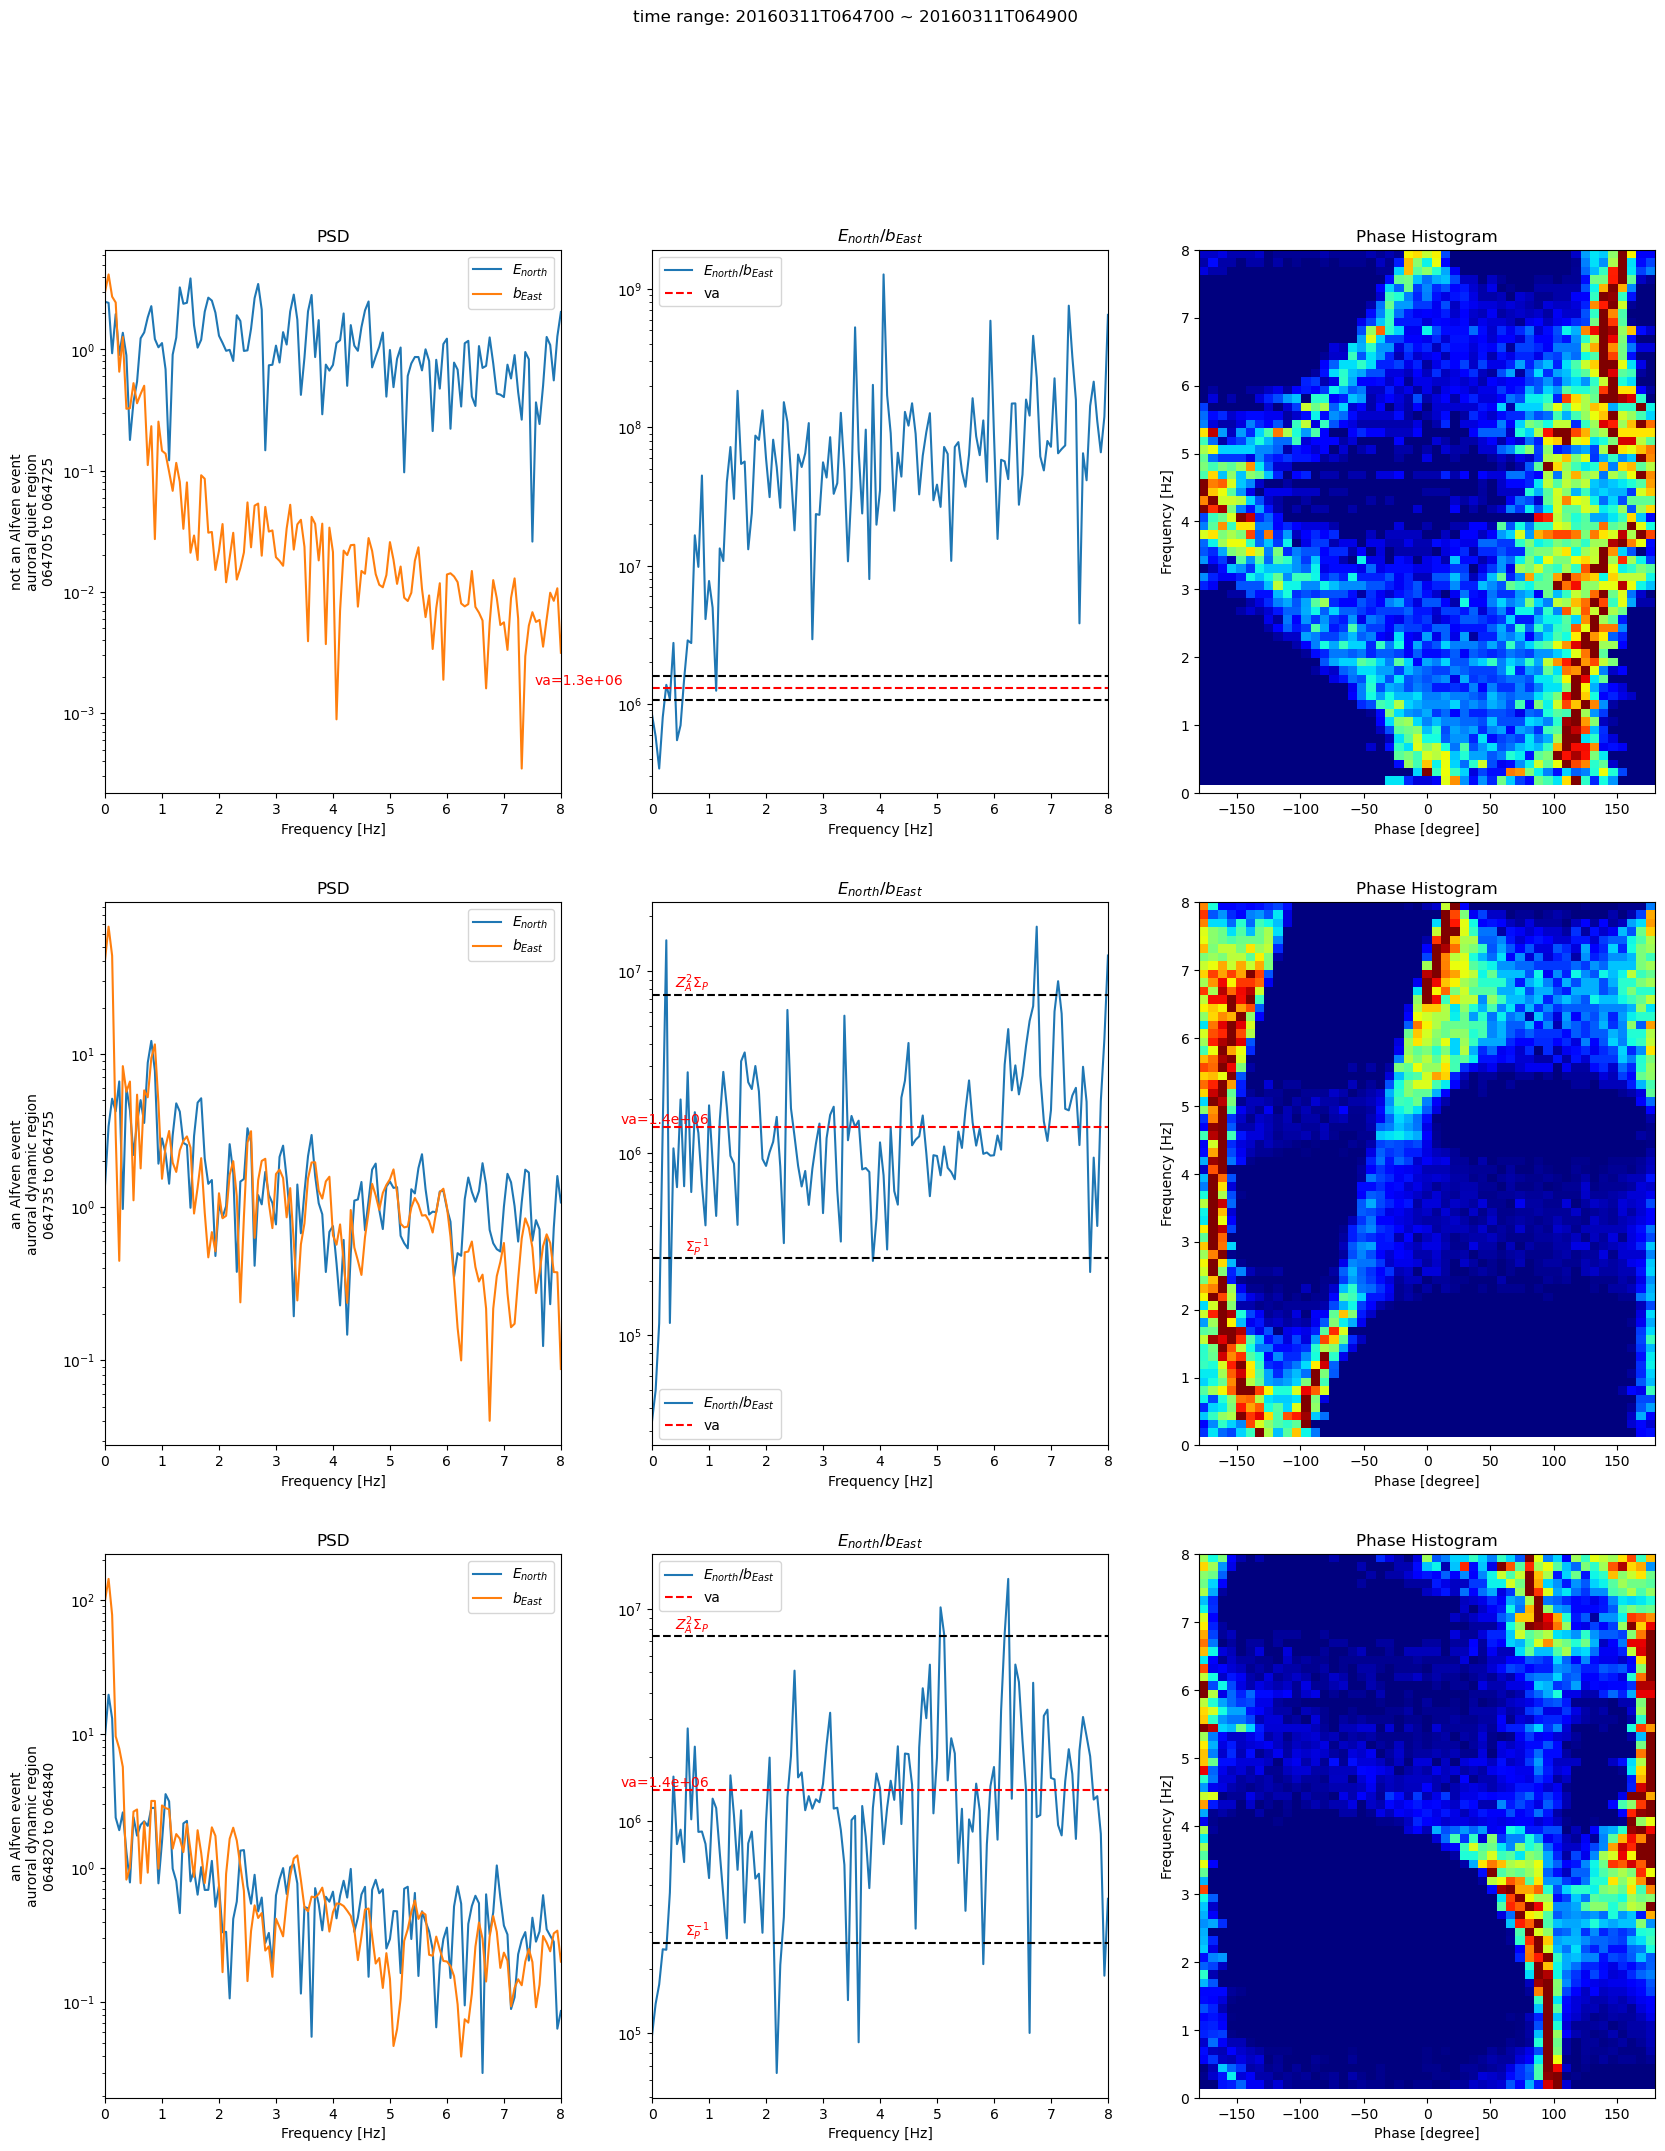

In [186]:
signal1 = signal1_back
signal2 = signal2_align_back
start = pd.to_datetime('20160311T064705')
end = pd.to_datetime('20160311T064725')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
cwt21 = utils_spectral.CWT(signal1, signal2, sampling_period=1 / 16)


plt.figure(figsize=(20,24))
plt.suptitle('time range: 20160311T064700 ~ 20160311T064900')
# f1
assert all(signal1.index == signal2.index), "signal1 and signal2 must have the same index"
psd1 = utils_spectral.PSD(signal1, 16)
psd2 = utils_spectral.PSD(signal2, 16)
freqs1, Pxx1 = psd1.get_psd()
freqs2, Pxx2 = psd2.get_psd()
assert all(freqs1 == freqs2), "freqs1 and freqs2 must be equal"
x = freqs1
y1 = np.sqrt(Pxx1)
y2 = np.sqrt(Pxx2)
plt.subplot(331)
plt.plot(x, y1, label=r'$E_{north}$')
plt.plot(x, y2, label=r'$b_{East}$')
plt.xlim([0,8])
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('not an Alfven event\nauroral quiet region\n064705 to 064725')
plt.title('PSD')


x = freqs1
y = np.sqrt(Pxx1 / Pxx2) * 1e6
plt.subplot(332)
plt.plot(x, y, label=r'$E_{north}$/$b_{East}$')
plt.xlim([0,8])
plt.axhline(y=va_quiet, color='red', linestyle='--', linewidth=1.5, label='va')
plt.axhline(y=1/(mu0 * Sigma_P_quiet), color='black', linestyle='--', linewidth=1.5,label='_')
plt.axhline(y=(mu0 * va_quiet ** 2 * Sigma_P_quiet), color='black', linestyle='--', linewidth=1.5, label='_')
# Add annotation for the horizontal line
plt.text(x=-0.5, y=va_quiet, s=f'va={va_quiet:.1e}', color='red', verticalalignment='bottom', horizontalalignment='right')
# plt.text(x=-0.5, y=1/(mu0 * Sigma_P_quiet), s=r'$\Sigma_P^{-1}$', color='red', verticalalignment='bottom', horizontalalignment='right')
# plt.text(x=-0.5, y=(mu0 * va_quiet ** 2 * Sigma_P_quiet), s=r'$Z_A^2 \Sigma_P$', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.title(r'$E_{north}$/$b_{East}$')
plt.legend()

hist_counts, freqs = cwt21.get_phase_hist_counts()
plt.subplot(333)
plt.imshow(hist_counts, extent=[-180, 180,freqs[-1], freqs[0]], aspect='auto', cmap='jet')
plt.ylim([0,8])
# plt.colorbar(label='Normalized Counts')
plt.xlabel('Phase [degree]')
plt.ylabel('Frequency [Hz]')
plt.title('Phase Histogram')


###
signal1 = signal1_back
signal2 = signal2_align_back
start = pd.to_datetime('20160311T064735')
end = pd.to_datetime('20160311T064755')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
cwt21 = utils_spectral.CWT(signal1, signal2, sampling_period=1 / 16)


# f4
assert all(signal1.index == signal2.index), "signal1 and signal2 must have the same index"
psd1 = utils_spectral.PSD(signal1, 16)
psd2 = utils_spectral.PSD(signal2, 16)
freqs1, Pxx1 = psd1.get_psd()
freqs2, Pxx2 = psd2.get_psd()
assert all(freqs1 == freqs2), "freqs1 and freqs2 must be equal"
x = freqs1
y1 = np.sqrt(Pxx1)
y2 = np.sqrt(Pxx2)
plt.subplot(334)
plt.plot(x, y1, label=r'$E_{north}$')
plt.plot(x, y2, label=r'$b_{East}$')
plt.xlim([0,8])
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('an Alfven event\nauroral dynamic region\n064735 to 064755')
plt.title('PSD')


x = freqs1
y = np.sqrt(Pxx1 / Pxx2) * 1e6
plt.subplot(335)
plt.plot(x, y, label=r'$E_{north}$/$b_{East}$')
plt.xlim([0,8])
plt.axhline(y=va_auroral, color='red', linestyle='--', linewidth=1.5, label='va')
plt.axhline(y=1/(mu0 * Sigma_P_auroral), color='black', linestyle='--', linewidth=1.5,label='_')
plt.axhline(y=(mu0 * va_auroral ** 2 * Sigma_P_auroral), color='black', linestyle='--', linewidth=1.5, label='_')
# Add annotation for the horizontal line
plt.text(x=1, y=va_auroral, s=f'va={va_auroral:.1e}', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.text(x=1, y=1/(mu0 * Sigma_P_auroral), s=r'$\Sigma_P^{-1}$', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.text(x=1, y=(mu0 * va_auroral ** 2 * Sigma_P_auroral), s=r'$Z_A^2 \Sigma_P$', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.title(r'$E_{north}$/$b_{East}$')
plt.legend()

hist_counts, freqs = cwt21.get_phase_hist_counts()
plt.subplot(336)
plt.imshow(hist_counts, extent=[-180, 180,freqs[-1], freqs[0]], aspect='auto', cmap='jet')
plt.ylim([0,8])
# plt.colorbar(label='Normalized Counts')
plt.xlabel('Phase [degree]')
plt.ylabel('Frequency [Hz]')
plt.title('Phase Histogram')


###
signal1 = signal1_back
signal2 = signal2_align_back
start = pd.to_datetime('20160311T064820')
end = pd.to_datetime('20160311T064840')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
cwt21 = utils_spectral.CWT(signal1, signal2, sampling_period=1 / 16)


# f4
assert all(signal1.index == signal2.index), "signal1 and signal2 must have the same index"
psd1 = utils_spectral.PSD(signal1, 16)
psd2 = utils_spectral.PSD(signal2, 16)
freqs1, Pxx1 = psd1.get_psd()
freqs2, Pxx2 = psd2.get_psd()
assert all(freqs1 == freqs2), "freqs1 and freqs2 must be equal"
x = freqs1
y1 = np.sqrt(Pxx1)
y2 = np.sqrt(Pxx2)
plt.subplot(337)
plt.plot(x, y1, label=r'$E_{north}$')
plt.plot(x, y2, label=r'$b_{East}$')
plt.xlim([0,8])
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('an Alfven event\nauroral dynamic region\n064820 to 064840')
plt.title('PSD')


x = freqs1
y = np.sqrt(Pxx1 / Pxx2) * 1e6
plt.subplot(338)
plt.plot(x, y, label=r'$E_{north}$/$b_{East}$')
plt.xlim([0,8])
plt.axhline(y=va_auroral, color='red', linestyle='--', linewidth=1.5, label='va')
plt.axhline(y=1/(mu0 * Sigma_P_auroral), color='black', linestyle='--', linewidth=1.5,label='_')
plt.axhline(y=(mu0 * va_auroral ** 2 * Sigma_P_auroral), color='black', linestyle='--', linewidth=1.5, label='_')
# Add annotation for the horizontal line
plt.text(x=1, y=va_auroral, s=f'va={va_auroral:.1e}', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.text(x=1, y=1/(mu0 * Sigma_P_auroral), s=r'$\Sigma_P^{-1}$', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.text(x=1, y=(mu0 * va_auroral ** 2 * Sigma_P_auroral), s=r'$Z_A^2 \Sigma_P$', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.title(r'$E_{north}$/$b_{East}$')
plt.legend()

hist_counts, freqs = cwt21.get_phase_hist_counts()
plt.subplot(339)
plt.imshow(hist_counts, extent=[-180, 180,freqs[-1], freqs[0]], aspect='auto', cmap='jet')
plt.ylim([0,8])
# plt.colorbar(label='Normalized Counts')
plt.xlabel('Phase [degree]')
plt.ylabel('Frequency [Hz]')
plt.title('Phase Histogram')


#
# swarm.figure_psd(signal1, signal2, 16)
# swarm.figure_ratio(signal1, signal2, 16)
# cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)

dynamic

In [187]:
# signal1 = e1
# signal2 = b2_align_low
# start = pd.to_datetime('20160311T064735')
# end = pd.to_datetime('20160311T064755')
# signal1 = signal1.loc[start:end]
# signal2 = signal2.loc[start:end]
# swarm.figure_psd(signal1, signal2, 16)
# swarm.figure_ratio(signal1, signal2, 16)
# cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
# cwt.plot_phase_hist_counts()

dynamic

In [188]:
# signal1 = e1
# signal2 = b2_align_low
# start = pd.to_datetime('20160311T064820')
# end = pd.to_datetime('20160311T064840')
# signal1 = signal1.loc[start:end]
# signal2 = signal2.loc[start:end]
# swarm.figure_psd(signal1, signal2, 16)
# swarm.figure_ratio(signal1, signal2, 16)
# cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
# cwt.plot_phase_hist_counts()

In [189]:
df_e = swarm_e.df.loc[pd.to_datetime('20160311T064900'):pd.to_datetime('20160311T065100')]
df_b = swarm_b.df.loc[pd.to_datetime('20160311T064900'):pd.to_datetime('20160311T065100')]

signal1 = e compo
signal2 = b compo (with signal1, consist of a pair)

In [190]:
signal1 = df_e['eh1_enu1']

In [191]:
signal2 = df_b['b1_enu2']

(<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>)

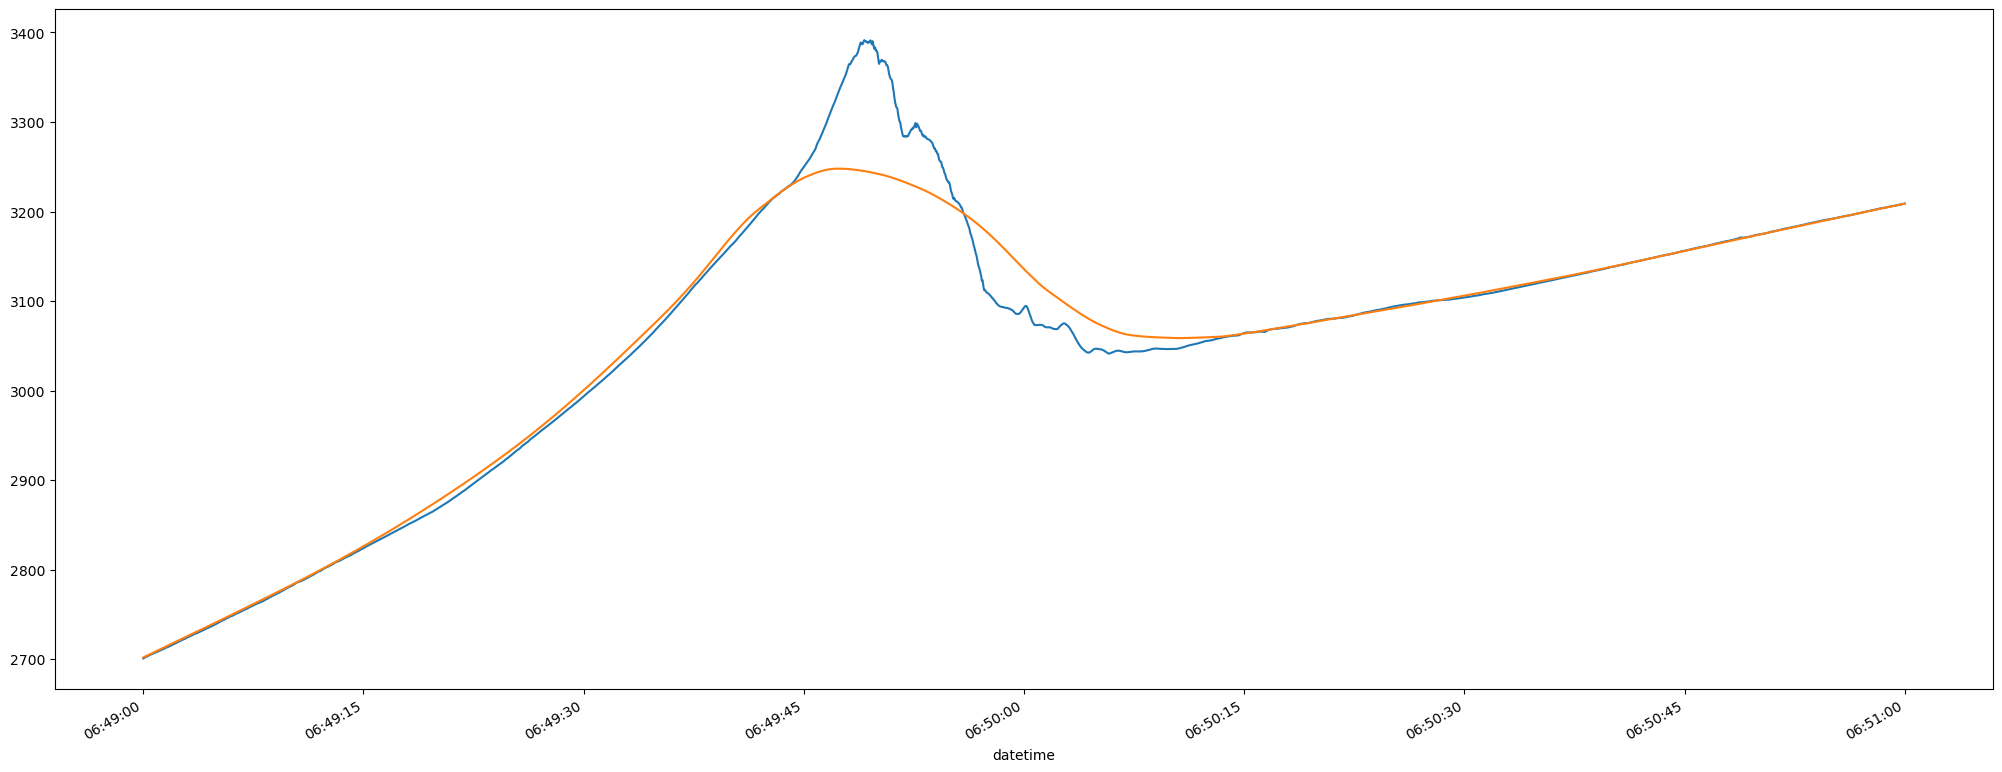

In [192]:
df_b['b_enu1'].plot(),df_b['b0_enu1'].plot()

In [193]:
low_fre = 0.2
high_fre = 8
signal1_filtered = pd.Series(data=utils_preprocess.LHBFilter(signal1, 16,lowcut=0.2, highcut=4).apply_filter(), index=signal1.index)
signal2_filtered = pd.Series(data=utils_preprocess.LHBFilter(signal2, 50, lowcut=0.2, highcut=4).apply_filter(), index=signal2.index)

In [194]:
# signal2_filtered_8 = pd.Series(data=utils_preprocess.LHBFilter(signal2, 50, lowcut=8).apply_filter(), index=signal2.index)
# signal2.plot(),signal2_filtered_8.plot()

In [195]:
signal1_stft = utils_spectral.STFT(signal1,16)
signal2_stft = utils_spectral.STFT(signal2,50)
signal1_stft_freqs, signal1_stft_times, Sxx = signal1_stft.get_stft()
signal1_stft_times = signal1.index[0] + pd.to_timedelta(signal1_stft_times, unit='s')
signal1_stft_Sxx = abs(Sxx)
signal2_stft_freqs, signal2_stft_times, Sxx = signal2_stft.get_stft()
signal2_stft_times = signal2.index[0] + pd.to_timedelta(signal2_stft_times, unit='s')
signal2_stft_Sxx = abs(Sxx)

# 频率范围
freq_min = 0
freq_max = 8
# 通过布尔索引选取频率范围 [0, 8] 的数据
freq_mask = (signal2_stft_freqs >= freq_min) & (signal2_stft_freqs <= freq_max)
signal2_stft_selected_freqs = signal2_stft_freqs[freq_mask]  # 筛选频率
signal2_stft_selected_Sxx = signal2_stft_Sxx[freq_mask, :]   # 筛选对应的谱图数据

In [196]:
signal2_align = utils_preprocess.align_high2low(signal2,signal1)

(<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>)

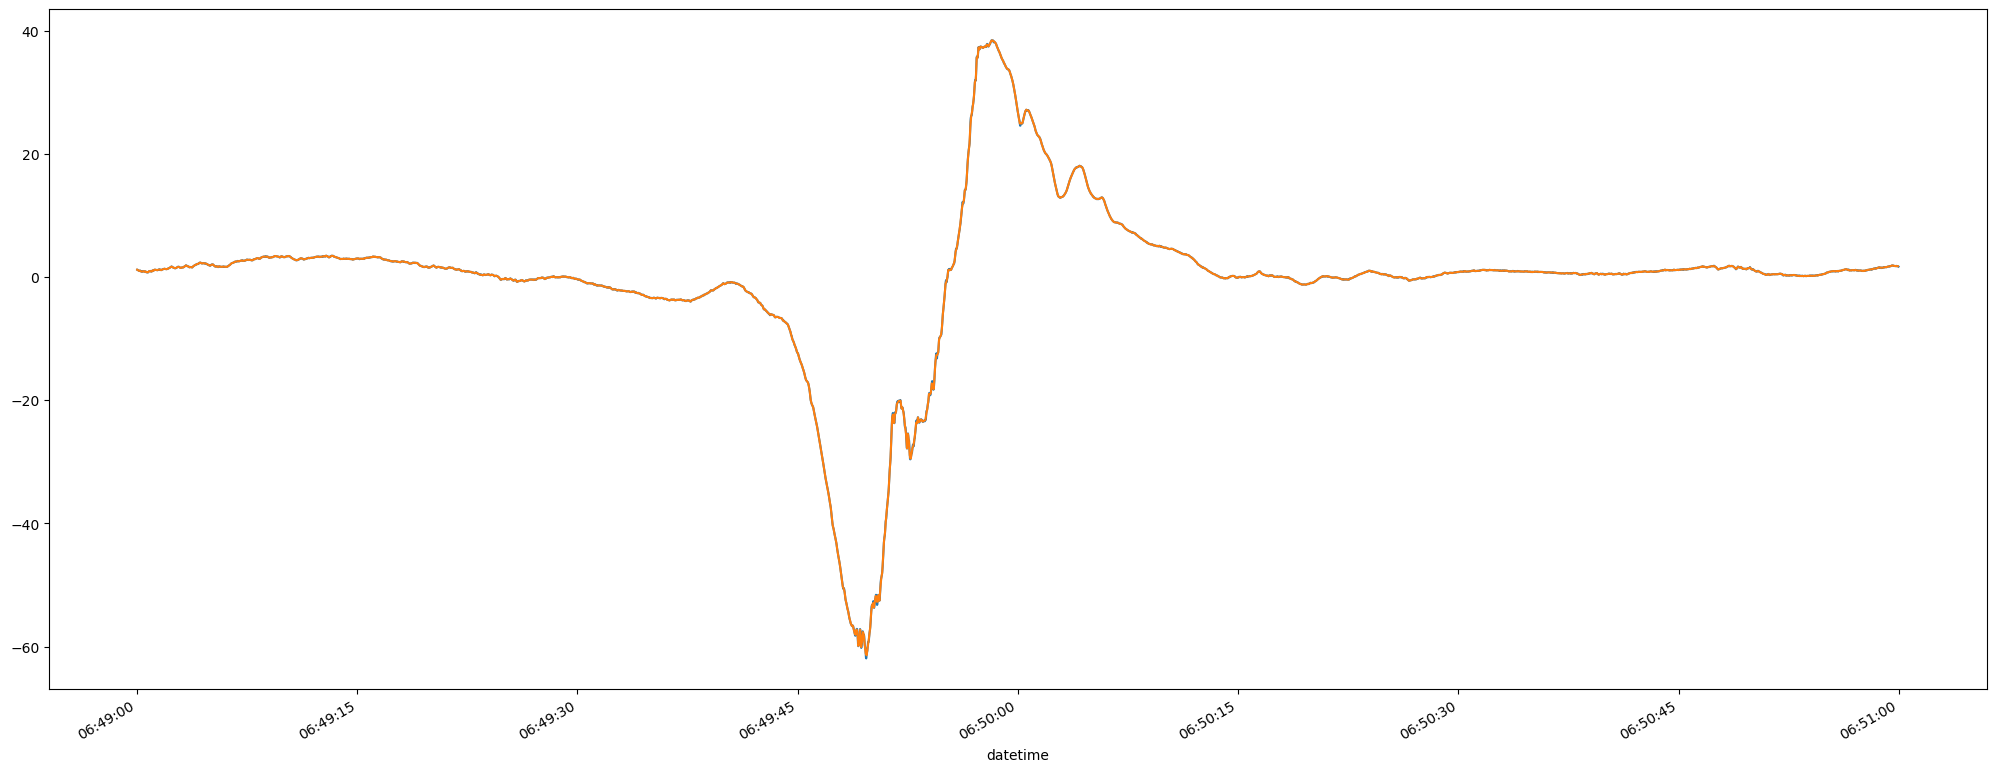

In [197]:
signal2.plot(),signal2_align.plot()

In [198]:
cwt21 = utils_spectral.CWT(signal1, signal2_align, sampling_period=1 / 16)
cwt21_cross_spectrum_modulus, _, cwt21_freqs = cwt21.get_cross_spectral()
# 频率范围
cwt21_freq_min = 0
cwt21_freq_max = 8
# 通过布尔索引选取频率范围 [0, 8] 的数据
cwt21_freq_mask = (cwt21_freqs >= cwt21_freq_min) & (cwt21_freqs <= cwt21_freq_max)
cwt21_selected_freqs = cwt21_freqs[cwt21_freq_mask]  # 筛选频率
cwt21_selected_cross_spectrum_modulus = cwt21_cross_spectrum_modulus[cwt21_freq_mask, :]   # 筛选对应的谱图数据

# cwt21.plot_module()

In [199]:
# plt.figure(figsize=(10, 4))
# plt.pcolormesh(signal1_stft_times, signal1_stft_freqs, signal1_stft_Sxx, shading='gouraud')
# plt.ylim([0,8])
# plt.colorbar(label='csd module')
# plt.xlabel('UT Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.title('Cross-Spectrogram module between Signal 1 and Signal 2')
# plt.show()

In [200]:
# freqs, times, Sxx = signal2_stft.get_stft()
# times =
# Sxx = abs(Sxx)
# plt.figure(figsize=(10, 4))
# plt.pcolormesh(times, freqs, Sxx, shading='gouraud')
# plt.ylim([0,8])
# plt.colorbar(label='csd module')
# plt.xlabel('UT Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.title('Cross-Spectrogram module between Signal 1 and Signal 2')
# plt.show()

Text(0, 0.5, 'cross spectrum modulus')

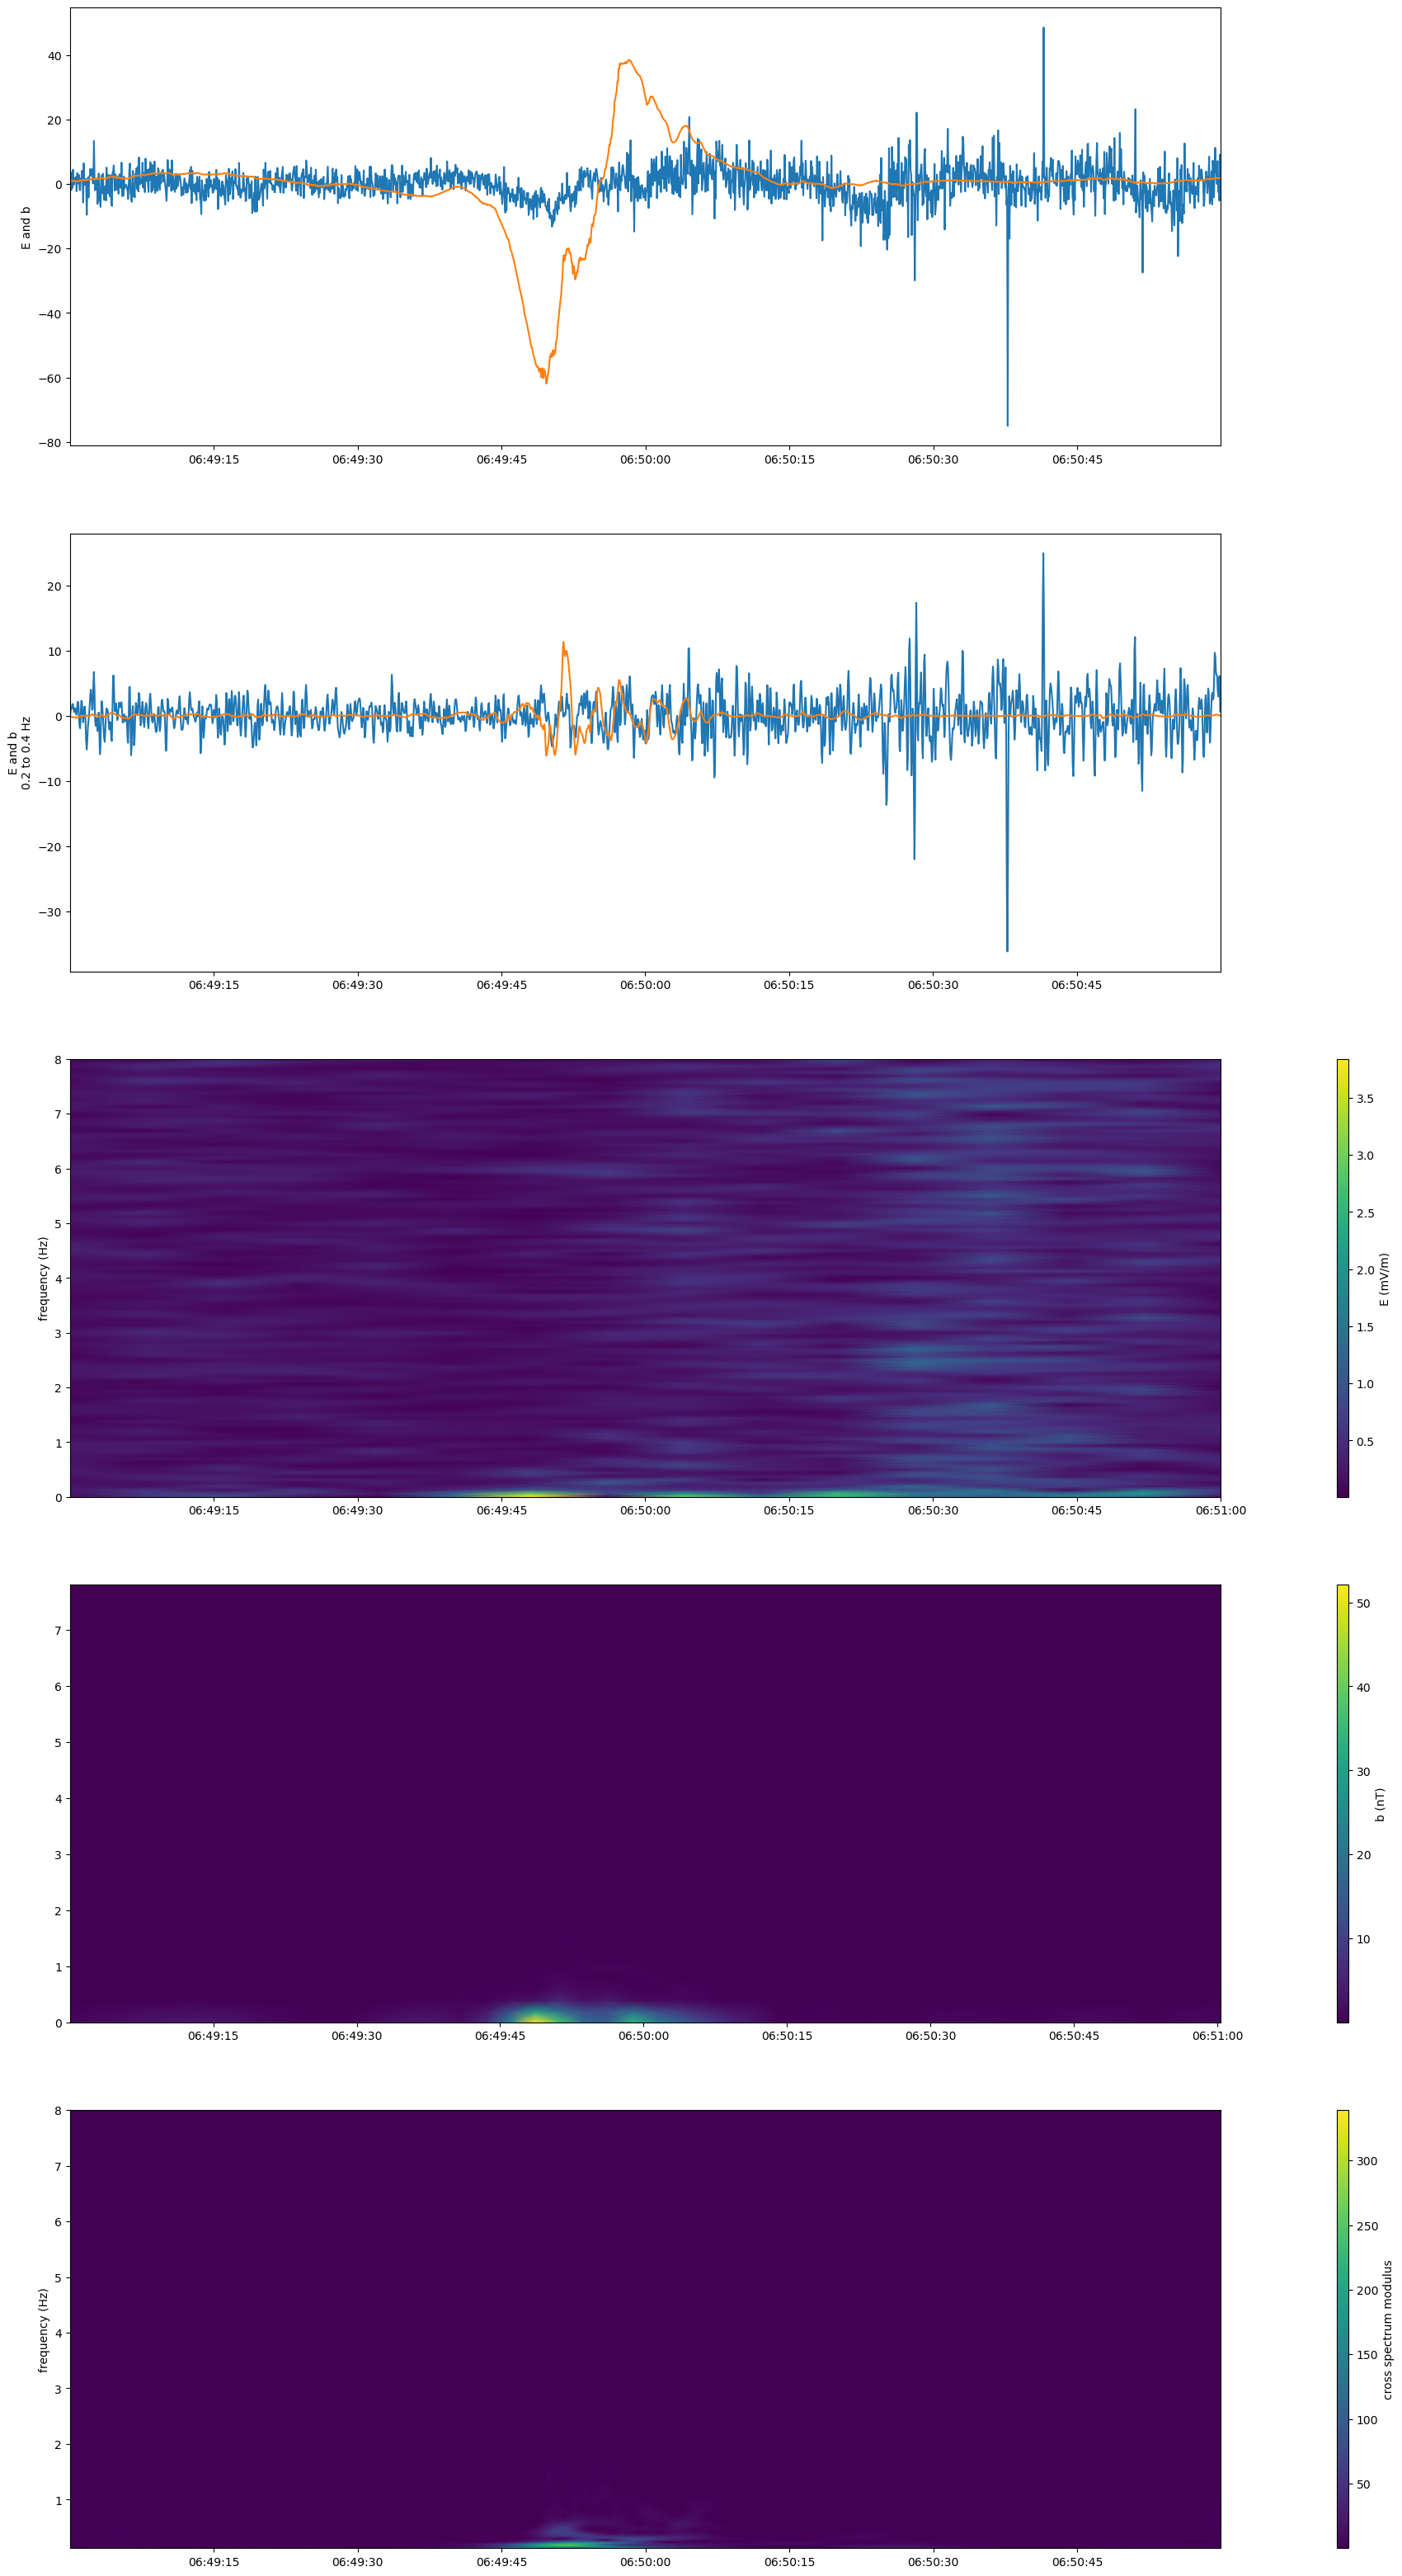

In [201]:
def plot_vline(ax,color='red'):
    ax.axvline(x=pd.to_datetime('2016-03-11 06:47:05'),color=color,linestyle='--')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:47:25'),color=color,linestyle='--')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:47:35'),color=color,linestyle='-')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:47:55'),color=color,linestyle='-')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:48:20'),color=color,linestyle='-')
    ax.axvline(x=pd.to_datetime('2016-03-11 06:48:40'),color=color,linestyle='-')
    return None

fig = plt.figure(figsize=(20,40))

gs = GridSpec(5,2,width_ratios=[1,0.01],figure=fig)

#
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(signal1.index,signal1.values)
ax1.plot(signal2.index,signal2.values)
ax1.set_xlim(signal1.index[0],signal1.index[-1])
ax1.set_ylabel('E and b')
plot_vline(ax1)

#
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(signal1_filtered.index,signal1_filtered.values)
ax2.plot(signal2_filtered.index,signal2_filtered.values)
ax2.set_xlim(signal2_filtered.index[0],signal2_filtered.index[-1])
ax2.set_ylabel('E and b\n0.2 to 0.4 Hz')
plot_vline(ax2)

#
ax3 = fig.add_subplot(gs[2,0])
p1 = ax3.pcolormesh(signal1_stft_times, signal1_stft_freqs, signal1_stft_Sxx, shading='gouraud')
ax3.set_xlim(signal1_stft_times[0], signal1_stft_times[-1])
ax3.set_ylabel('frequency (Hz)')
plot_vline(ax3)

#
cbar_ax1 = fig.add_subplot(gs[2,1])
cbar1 = fig.colorbar(p1, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('E (mV/m)')

#
ax5 = fig.add_subplot(gs[3,0])
p2 = ax5.pcolormesh(signal2_stft_times, signal2_stft_selected_freqs, signal2_stft_selected_Sxx, shading='gouraud')
ax5.set_xlim(signal2_stft_times[0], signal2_stft_times[-1])
plot_vline(ax5)

#
cbar_ax2 = fig.add_subplot(gs[3,1])
cbar2 = fig.colorbar(p2, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('b (nT)')

#
ax6 = fig.add_subplot(gs[4,0])
p3 = ax6.pcolormesh(signal1.index, cwt21_selected_freqs, cwt21_selected_cross_spectrum_modulus, shading='gouraud')
ax6.set_xlim(signal1.index[0], signal1.index[-1])
ax6.set_ylabel('frequency (Hz)')
plot_vline(ax6)

#
cbar_ax3 = fig.add_subplot(gs[4,1])
cbar3 = fig.colorbar(p3, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('cross spectrum modulus')

Text(0.5, 1.0, 'Phase Histogram')

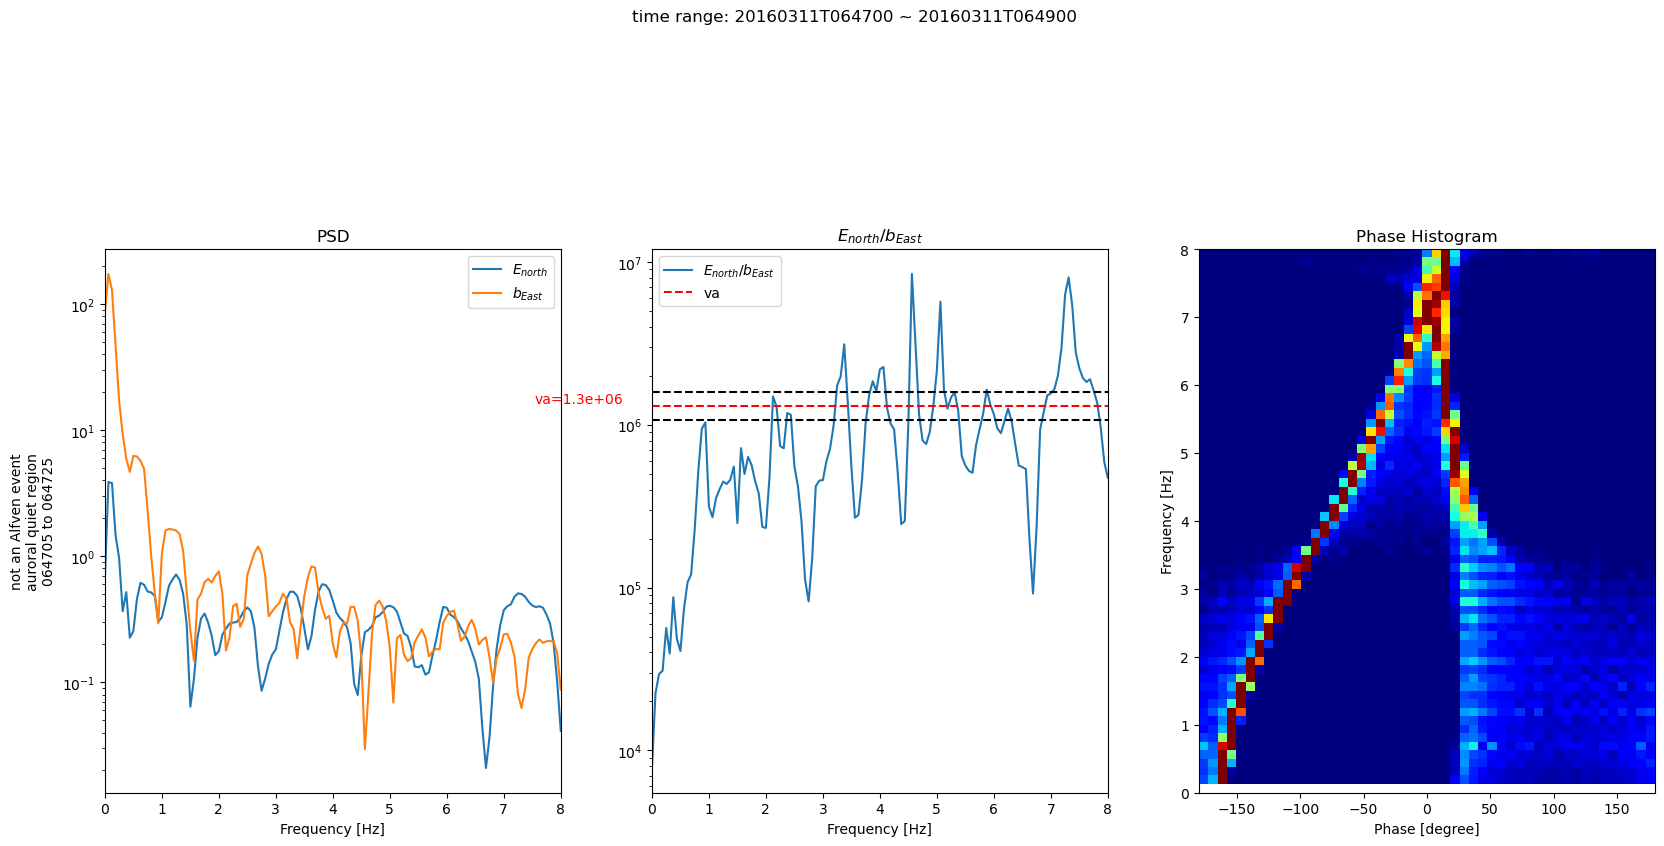

In [202]:
signal1 = signal1_back
signal2 = signal2_align_back
start = pd.to_datetime('20160311T064940')
end = pd.to_datetime('20160311T065000')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
cwt21 = utils_spectral.CWT(signal1, signal2, sampling_period=1 / 16)


plt.figure(figsize=(20,24))
plt.suptitle('time range: 20160311T064700 ~ 20160311T064900')
# f1
assert all(signal1.index == signal2.index), "signal1 and signal2 must have the same index"
psd1 = utils_spectral.PSD(signal1, 16)
psd2 = utils_spectral.PSD(signal2, 16)
freqs1, Pxx1 = psd1.get_psd()
freqs2, Pxx2 = psd2.get_psd()
assert all(freqs1 == freqs2), "freqs1 and freqs2 must be equal"
x = freqs1
y1 = np.sqrt(Pxx1)
y2 = np.sqrt(Pxx2)
plt.subplot(331)
plt.plot(x, y1, label=r'$E_{north}$')
plt.plot(x, y2, label=r'$b_{East}$')
plt.xlim([0,8])
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('not an Alfven event\nauroral quiet region\n064705 to 064725')
plt.title('PSD')


x = freqs1
y = np.sqrt(Pxx1 / Pxx2) * 1e6
plt.subplot(332)
plt.plot(x, y, label=r'$E_{north}$/$b_{East}$')
plt.xlim([0,8])
plt.axhline(y=va_quiet, color='red', linestyle='--', linewidth=1.5, label='va')
plt.axhline(y=1/(mu0 * Sigma_P_quiet), color='black', linestyle='--', linewidth=1.5,label='_')
plt.axhline(y=(mu0 * va_quiet ** 2 * Sigma_P_quiet), color='black', linestyle='--', linewidth=1.5, label='_')
# Add annotation for the horizontal line
plt.text(x=-0.5, y=va_quiet, s=f'va={va_quiet:.1e}', color='red', verticalalignment='bottom', horizontalalignment='right')
# plt.text(x=-0.5, y=1/(mu0 * Sigma_P_quiet), s=r'$\Sigma_P^{-1}$', color='red', verticalalignment='bottom', horizontalalignment='right')
# plt.text(x=-0.5, y=(mu0 * va_quiet ** 2 * Sigma_P_quiet), s=r'$Z_A^2 \Sigma_P$', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.title(r'$E_{north}$/$b_{East}$')
plt.legend()

hist_counts, freqs = cwt21.get_phase_hist_counts()
plt.subplot(333)
plt.imshow(hist_counts, extent=[-180, 180,freqs[-1], freqs[0]], aspect='auto', cmap='jet')
plt.ylim([0,8])
# plt.colorbar(label='Normalized Counts')
plt.xlabel('Phase [degree]')
plt.ylabel('Frequency [Hz]')
plt.title('Phase Histogram')